# WELOCALIZE ANALYTICS LEAD: TECHNICAL ASSESSMENT

## 01 - Data load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = '/Users/aaron/Documentos/WELOC/data/Welocalize_Analytics_Lead_Assessment_Dataset_Oct24.csv'
df = pd.read_csv(file_path)

## 02 - Before preprocessing

In [5]:
# Check the basic structure
print("Dataframe Info:")
print(df.info())

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# For categorical columns, see unique value counts
print("\nUnique values in 'is_client_deliverable_past_due':")
print(df['is_client_deliverable_past_due'].value_counts())

print("\nUnique values in 'content_specialty':")
print(df['content_specialty'].value_counts())

# Convert the date column to datetime format
df['date_client_deliverable_delivered'] = pd.to_datetime(df['date_client_deliverable_delivered'], errors='coerce')
print("\nFirst 5 values of the converted date column:")
print(df['date_client_deliverable_delivered'].head())

# Examine key duration metrics to understand their distributions
print("\nSummary Statistics for 'average_duration_task_claimed_to_task_started_seconds':")
print(df['average_duration_task_claimed_to_task_started_seconds'].describe())

# Check missing values specifically for duration columns
duration_cols = [
    'average_duration_offer_sent_to_offer_accepted_seconds',
    'average_duration_task_claimed_to_task_started_seconds',
    'average_durations_request_received_to_quoted_business_seconds'
]
print("\nMissing Values in Duration Columns:")
print(df[duration_cols].isnull().sum())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742823 entries, 0 to 742822
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   client_deliverable_id                                          742823 non-null  int64  
 1   date_client_deliverable_delivered                              742823 non-null  object 
 2   translation_supplier_id                                        742823 non-null  object 
 3   source_language_locale_code                                    742823 non-null  object 
 4   target_language_locale_code                                    742823 non-null  object 
 5   project_manager_id                                             742823 non-null  int64  
 6   content_specialty                                              742823 non-null  object 
 7   service_line                   

In [6]:
df.describe()

,client_deliverable_id,date_client_deliverable_delivered,project_manager_id,lateness_of_client_deliverable_seconds,client_amount,client_words,tasks,average_duration_offer_sent_to_offer_accepted_seconds,average_duration_task_claimed_to_task_started_seconds,average_durations_request_received_to_quoted_business_seconds,translations_for_client_by_supplier_to_date
count,7.428230e+05,742823,742823.000000,3.576300e+04,742823.000000,7.428230e+05,742823.000000,5.547990e+05,7.339110e+05,1.251300e+04,742823.000000
mean,9.366918e+06,2023-03-25 17:35:34.891891712,39.994653,4.540732e+05,79.481357,1.355787e+03,2.346459,7.156542e+03,1.565338e+05,5.435354e+04,17587.319531
min,8.904737e+06,1900-01-01 00:00:00,1.000000,8.100000e-02,0.000000,1.100000e-01,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,9.135852e+06,2023-02-17 00:00:00,12.000000,4.564840e+04,1.690000,1.180000e+01,2.000000,0.000000e+00,1.819600e+04,3.219353e+03,1239.000000
50%,9.364473e+06,2023-03-25 00:00:00,20.000000,1.718220e+05,7.230000,4.800000e+01,2.000000,0.000000e+00,8.775300e+04,1.430082e+04,6854.000000
75%,9.599174e+06,2023-05-04 00:00:00,43.000000,4.708295e+05,32.598550,2.450000e+02,2.000000,0.000000e+00,2.196315e+05,6.508362e+04,28192.000000
max,1.204446e+07,2024-05-21 00:00:00,261.000000,3.005021e+07,105334.810000,5.438579e+06,300.000000,5.604150e+06,8.975581e+06,5.838997e+06,82489.000000
std,2.683556e+05,NaN,48.200755,9.160875e+05,557.201942,2.097447e+04,1.413466,7.388441e+04,2.310975e+05,2.001472e+05,21976.565538


## 03 - preprocessing

In [7]:
# Convert date column to datetime and extract additional features
df['date_client_deliverable_delivered'] = pd.to_datetime(df['date_client_deliverable_delivered'], errors='coerce')
df['delivery_year'] = df['date_client_deliverable_delivered'].dt.year
df['delivery_month'] = df['date_client_deliverable_delivered'].dt.month
df['delivery_dayofweek'] = df['date_client_deliverable_delivered'].dt.dayofweek

# Handle missing values for lateness
df.loc[(df['is_client_deliverable_past_due'] == 'N') & (df['lateness_of_client_deliverable_seconds'].isnull()), 
       'lateness_of_client_deliverable_seconds'] = 0

# Impute missing values in duration columns using the median calculated per content specialty
duration_cols = [
    'average_duration_offer_sent_to_offer_accepted_seconds',
    'average_duration_task_claimed_to_task_started_seconds',
    'average_durations_request_received_to_quoted_business_seconds'
]

for col in duration_cols:
    # Compute median per content specialty and fill missing values accordingly
    df[col] = df[col].fillna(df.groupby('content_specialty')[col].transform('median'))

# Create a binary flag for On-Time Delivery (OTD): 1 if on time ('N'), 0 if late ('Y')
df['otd_flag'] = df['is_client_deliverable_past_due'].apply(lambda x: 1 if x == 'N' else 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742823 entries, 0 to 742822
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   client_deliverable_id                                          742823 non-null  int64         
 1   date_client_deliverable_delivered                              742823 non-null  datetime64[ns]
 2   translation_supplier_id                                        742823 non-null  object        
 3   source_language_locale_code                                    742823 non-null  object        
 4   target_language_locale_code                                    742823 non-null  object        
 5   project_manager_id                                             742823 non-null  int64         
 6   content_specialty                                              742823 non-null  obje

## 04 - EDA

In [9]:
# Basic summary statistics

# Total number of deliverables
total_deliverables = len(df)

# Number of on-time and late deliverables using our otd_flag (1 for on-time, 0 for late)
on_time_deliverables = df[df['otd_flag'] == 1].shape[0]
late_deliverables = df[df['otd_flag'] == 0].shape[0]
overall_otd_rate = df['otd_flag'].mean()

print("Total Deliverables:", total_deliverables)
print("On-Time Deliverables:", on_time_deliverables)
print("Late Deliverables:", late_deliverables)
print("Overall On-Time Delivery Rate: {:.2%}".format(overall_otd_rate))
print("\n")

# Additional descriptive stats for key numerical columns
print("Client Amount Statistics:")
print(df['client_amount'].describe())
print("\nClient Words Statistics:")
print(df['client_words'].describe())
print("\nTask Duration (Claimed to Started) Statistics:")
print(df['average_duration_task_claimed_to_task_started_seconds'].describe())
print("\nOffer Sent to Offer Accepted Duration Statistics:")
print(df['average_duration_offer_sent_to_offer_accepted_seconds'].describe())
print("\nRequest Received to Quoted Duration Statistics:")
print(df['average_durations_request_received_to_quoted_business_seconds'].describe())
print("\n")

# Function to determine if a series has outliers using the IQR method
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (series < lower_bound) | (series > upper_bound)
    return outlier_mask.sum()

# Identify numeric columns for outlier detection, excluding key identifiers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_exclude = ['client_deliverable_id', 'project_manager_id']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Check and list columns that have outliers
columns_with_outliers = {}
for col in numeric_cols:
    outlier_count = has_outliers(df[col])
    if outlier_count > 0:
        columns_with_outliers[col] = outlier_count

print("Columns with Outliers and Count of Outlier Values:")
for col, count in columns_with_outliers.items():
    print(f" - {col}: {count} outlier(s)")


Total Deliverables: 742823
On-Time Deliverables: 707057
Late Deliverables: 35766
Overall On-Time Delivery Rate: 95.19%


Client Amount Statistics:
count    742823.000000
mean         79.481357
std         557.201942
min           0.000000
25%           1.690000
50%           7.230000
75%          32.598550
max      105334.810000
Name: client_amount, dtype: float64

Client Words Statistics:
count    7.428230e+05
mean     1.355787e+03
std      2.097447e+04
min      1.100000e-01
25%      1.180000e+01
50%      4.800000e+01
75%      2.450000e+02
max      5.438579e+06
Name: client_words, dtype: float64

Task Duration (Claimed to Started) Statistics:
count    7.428230e+05
mean     1.565306e+05
std      2.297798e+05
min      0.000000e+00
25%      1.868100e+04
50%      8.902700e+04
75%      2.171025e+05
max      8.975581e+06
Name: average_duration_task_claimed_to_task_started_seconds, dtype: float64

Offer Sent to Offer Accepted Duration Statistics:
count    7.428230e+05
mean     5.346855e+03
s

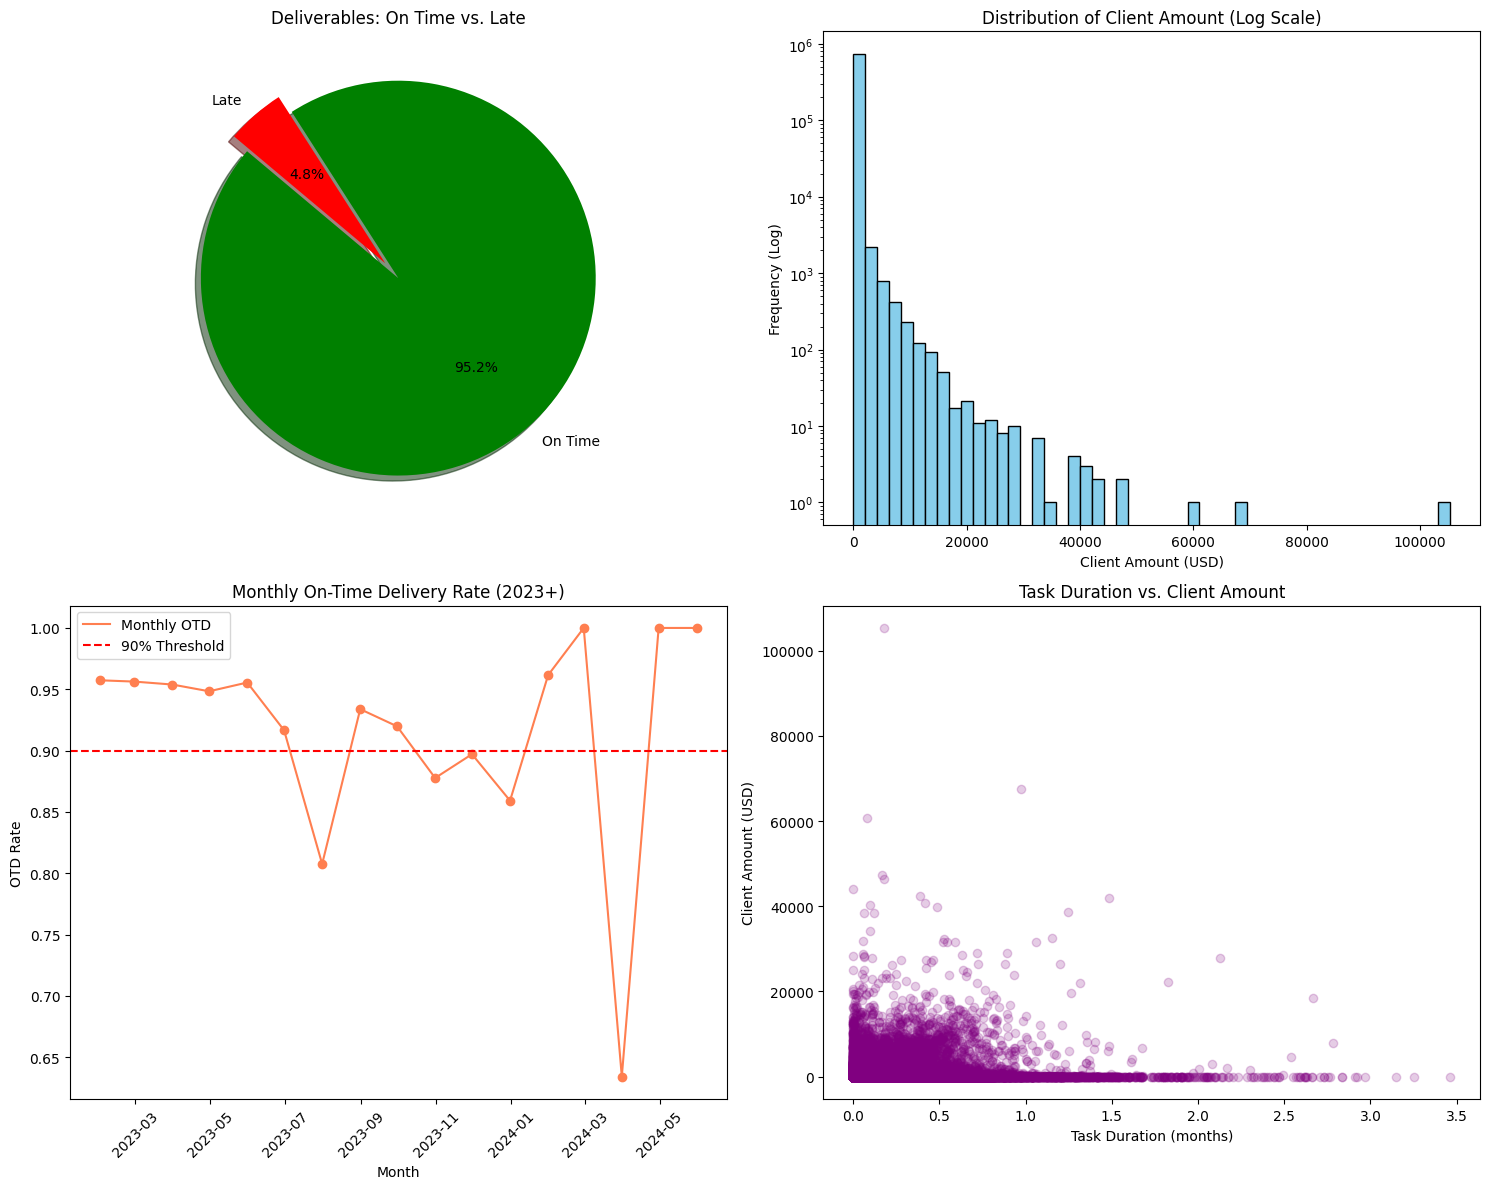

In [17]:
# PLOTS
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# --- PIE CHART: On-Time vs. Late Deliverables ---
labels = ['On Time', 'Late']
sizes = [
    df[df['otd_flag'] == 1].shape[0],
    df[df['otd_flag'] == 0].shape[0]
]
colors = ['green', 'red']  # Green for On Time, Red for Late
explode = (0, 0.1) 

axs[0, 0].pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)
axs[0, 0].set_title("Deliverables: On Time vs. Late")

# --- HISTOGRAM OF CLIENT AMOUNT (LOG SCALE) ---
axs[0, 1].hist(df['client_amount'], bins=50, color='skyblue', edgecolor='black', log=True)
axs[0, 1].set_title("Distribution of Client Amount (Log Scale)")
axs[0, 1].set_xlabel("Client Amount (USD)")
axs[0, 1].set_ylabel("Frequency (Log)")

# --- MONTHLY ON-TIME DELIVERY RATE (FILTERED FROM 2023 ONWARDS) ---
df_2023_onward = df[df['date_client_deliverable_delivered'] >= pd.to_datetime('2023-01-01')].copy()
monthly_otd = df_2023_onward.resample('M', on='date_client_deliverable_delivered')['otd_flag'].mean()

axs[1, 0].plot(monthly_otd.index, monthly_otd.values, color='coral', label='Monthly OTD')
axs[1, 0].scatter(monthly_otd.index, monthly_otd.values, color='coral')  # Add dots to the plot line
axs[1, 0].axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')

axs[1, 0].set_title("Monthly On-Time Delivery Rate (2023+)")
axs[1, 0].set_xlabel("Month")
axs[1, 0].set_ylabel("OTD Rate")
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend()

# --- SCATTER PLOT: TASK DURATION (MONTHS) VS. CLIENT AMOUNT ---
seconds_in_month = 30 * 24 * 3600
df['task_duration_months'] = df['average_duration_task_claimed_to_task_started_seconds'] / seconds_in_month

axs[1, 1].scatter(
    df['task_duration_months'],
    df['client_amount'],
    alpha=0.2,
    color='purple'
)
axs[1, 1].set_title("Task Duration vs. Client Amount")
axs[1, 1].set_xlabel("Task Duration (months)")
axs[1, 1].set_ylabel("Client Amount (USD)")

plt.tight_layout()
plt.show()


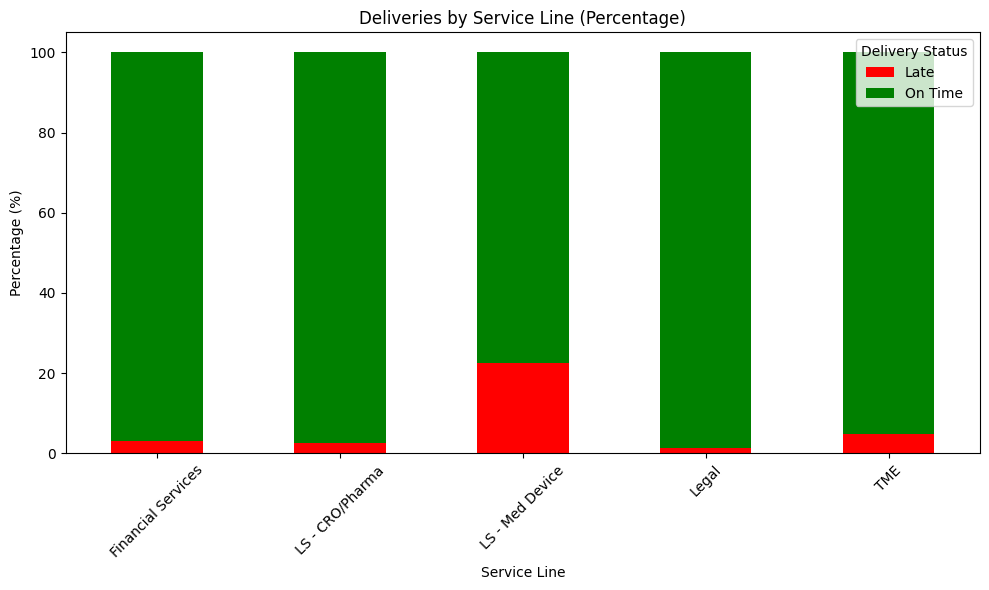

In [ ]:
# Stacked Bar Chart for On-Time vs. Late Deliveries by Service Line (Percentages)
service_otd = df.groupby(['service_line', 'otd_flag']).size().unstack(fill_value=0)
service_otd_percent = service_otd.div(service_otd.sum(axis=1), axis=0) * 100
service_otd_percent = service_otd_percent.rename(columns={0: 'Late', 1: 'On Time'})

fig, ax = plt.subplots(figsize=(10, 6))
service_otd_percent.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['red', 'green']
)
ax.set_title("Deliveries by Service Line (Percentage)")
ax.set_xlabel("Service Line")
ax.set_ylabel("Percentage (%)")
ax.legend(title="Delivery Status")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

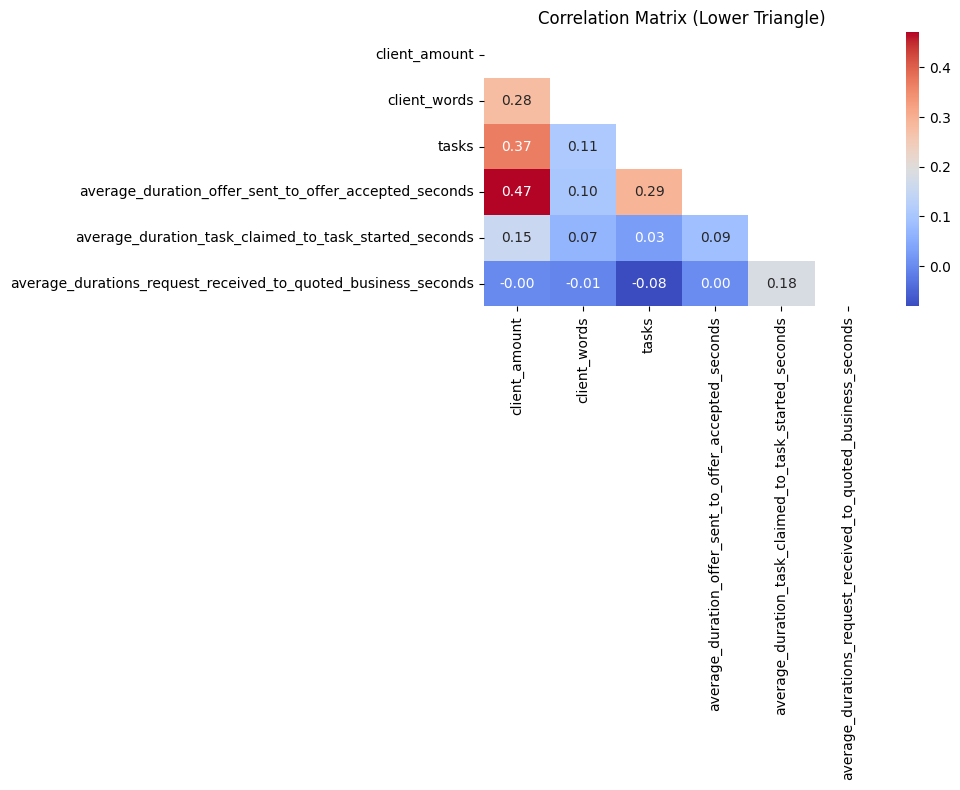

In [ ]:
# Correlation Heatmap (one-sided)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    cmap='coolwarm', 
    ax=ax, 
    fmt=".2f"
)
ax.set_title("Correlation Matrix (Lower Triangle)")

plt.tight_layout()
plt.show()

## 05 - DS  Classification models

In [22]:
from pycaret.classification import setup, compare_models

# Initialize the PyCaret environment without the 'silent' parameter.
clf_setup = setup(data=df, target='otd_flag', session_id=42, verbose=False)

# Compare a range of classification models and display performance metrics.
best_model = compare_models()

print(best_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:20:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,14.1160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 